In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import rho_plus as rp

theme, cs = rp.mpl_setup(False)

In [2]:
%%time

# Step 1: Load the CSV file
trainset = pd.read_csv("./oqmd_618K_features.csv",index_col=None)
pizeo_testset = pd.read_csv("./pizeo_testset.csv",index_col=None)
print(trainset     .shape)
print(pizeo_testset.shape)


(618803, 152)
(382, 152)
CPU times: user 8.52 s, sys: 656 ms, total: 9.18 s
Wall time: 9.17 s


In [3]:
trainset     =      trainset.drop_duplicates().dropna()
pizeo_testset= pizeo_testset.drop_duplicates().dropna()
print(trainset     .shape)
print(pizeo_testset.shape)

(419902, 152)
(382, 152)


In [4]:
#Rsplt_testset = pd.read_csv("./Rsplt_testset.csv",index_col=None)
#Xshft_testset = pd.read_csv("./Xshft_testset.csv",index_col=None)
#pizeo_testset = pd.read_csv("./pizeo_testset.csv",index_col=None)
#statY_testset = pd.read_csv("./statY_testset.csv",index_col=None)
#infoY_testset = pd.read_csv("./infoY_testset.csv",index_col=None)

# random split

In [5]:
from sklearn.model_selection import train_test_split
'''
_, test_data1 = train_test_split(trainset, test_size=0.01, random_state=123)
_, test_data2 = train_test_split(trainset, test_size=0.01, random_state=234)
_, test_data3 = train_test_split(trainset, test_size=0.01, random_state=345)
_, test_data4 = train_test_split(trainset, test_size=0.01, random_state=456)
_, test_data5 = train_test_split(trainset, test_size=0.01, random_state=567)
'''

'\n_, test_data1 = train_test_split(trainset, test_size=0.01, random_state=123)\n_, test_data2 = train_test_split(trainset, test_size=0.01, random_state=234)\n_, test_data3 = train_test_split(trainset, test_size=0.01, random_state=345)\n_, test_data4 = train_test_split(trainset, test_size=0.01, random_state=456)\n_, test_data5 = train_test_split(trainset, test_size=0.01, random_state=567)\n'

In [6]:
'''
test_data1.to_csv('Rsplt_testset1.csv', index=False)
test_data2.to_csv('Rsplt_testset2.csv', index=False)
test_data3.to_csv('Rsplt_testset3.csv', index=False)
test_data4.to_csv('Rsplt_testset4.csv', index=False)
test_data5.to_csv('Rsplt_testset5.csv', index=False)
'''

"\ntest_data1.to_csv('Rsplt_testset1.csv', index=False)\ntest_data2.to_csv('Rsplt_testset2.csv', index=False)\ntest_data3.to_csv('Rsplt_testset3.csv', index=False)\ntest_data4.to_csv('Rsplt_testset4.csv', index=False)\ntest_data5.to_csv('Rsplt_testset5.csv', index=False)\n"

In [7]:
test_data1 =pd.read_csv('../Rsplt_testset1.csv', index_col=None)
test_data2 =pd.read_csv('../Rsplt_testset2.csv', index_col=None)
test_data3 =pd.read_csv('../Rsplt_testset3.csv', index_col=None)
test_data4 =pd.read_csv('../Rsplt_testset4.csv', index_col=None)
test_data5 =pd.read_csv('../Rsplt_testset5.csv', index_col=None)

In [8]:
pizeo_formula =[i[0] for i in pizeo_testset[['pretty_comp']].values.tolist()]
test_data1_formula =[i[0] for i in test_data1   [['pretty_comp']].values.tolist()]
test_data2_formula =[i[0] for i in test_data2   [['pretty_comp']].values.tolist()]
test_data3_formula =[i[0] for i in test_data3   [['pretty_comp']].values.tolist()]
test_data4_formula =[i[0] for i in test_data4   [['pretty_comp']].values.tolist()]
test_data5_formula =[i[0] for i in test_data5   [['pretty_comp']].values.tolist()]

In [9]:
print(trainset     .shape)
final_train=trainset[~trainset['pretty_comp'].isin(pizeo_formula)]
print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(test_data1_formula)]
print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(test_data2_formula)]
print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(test_data3_formula)]
print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(test_data4_formula)]
print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(test_data5_formula)]
print(final_train     .shape)

(419902, 152)
(418925, 152)
(404091, 152)
(390274, 152)
(377517, 152)
(365701, 152)
(355030, 152)


In [10]:
final_train.to_csv('temp_trainset_no_pizeo_rsplt1_5.csv', index=False)

# X shift

In [11]:
excluded = ["pretty_comp",'volume_pa', 'stability', 'delta_e', 'magmom_pa', 'bandgap', 'energy_pa']
y = trainset['delta_e'].values
X = trainset.drop(excluded, axis=1)

In [26]:
subset

,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char
0,4,0.622700,0.580221,0.571763,0.571444,0.571429,14.0,67.0,53.0,28.571429,...,132.857143,71.836735,70.0,1.857143,2.571429,0.00,1.571429,True,0.551131,0.092316
142,2,0.707107,0.629961,0.574349,0.552045,0.535887,51.0,66.0,15.0,58.500000,...,180.000000,14.000000,166.0,2.000000,1.500000,5.00,5.000000,True,0.158210,0.039553
307,2,0.707107,0.629961,0.574349,0.552045,0.535887,49.0,68.0,19.0,58.500000,...,166.500000,27.500000,139.0,2.000000,0.500000,5.00,6.000000,False,0.070306,0.017577
442,2,0.707107,0.629961,0.574349,0.552045,0.535887,16.0,58.0,42.0,37.000000,...,132.000000,62.000000,70.0,2.000000,2.000000,0.50,0.500000,False,0.413100,0.103275
580,2,0.707107,0.629961,0.574349,0.552045,0.535887,26.0,45.0,19.0,35.500000,...,227.000000,2.000000,225.0,1.500000,0.000000,7.00,0.000000,False,0.049365,0.012341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616106,3,0.612372,0.538609,0.506099,0.501109,0.500098,26.0,72.0,46.0,38.000000,...,219.250000,12.625000,229.0,2.000000,0.000000,5.50,3.500000,False,0.088829,0.014229
616840,3,0.600000,0.514256,0.460906,0.441882,0.428730,72.0,82.0,10.0,77.600000,...,200.200000,9.920000,194.0,2.000000,0.800000,6.80,14.000000,False,0.232967,0.032154
617158,3,0.678233,0.624880,0.603719,0.600668,0.600059,8.0,56.0,48.0,25.500000,...,95.300000,99.960000,12.0,2.000000,2.400000,0.10,0.000000,False,0.803211,0.187883
617551,3,0.600000,0.514256,0.460906,0.441882,0.428730,42.0,44.0,2.0,43.200000,...,201.000000,11.200000,194.0,1.400000,0.000000,5.80,0.000000,False,0.022249,0.004932


In [66]:
from textwrap import wrap
print('\n'.join(wrap(', '.join(subset.columns), width=150)))

index, 0-norm, 2-norm, 3-norm, 5-norm, 7-norm, 10-norm, MagpieData minimum Number, MagpieData maximum Number, MagpieData range Number, MagpieData mean
Number, MagpieData avg_dev Number, MagpieData mode Number, MagpieData minimum MendeleevNumber, MagpieData maximum MendeleevNumber, MagpieData range
MendeleevNumber, MagpieData mean MendeleevNumber, MagpieData avg_dev MendeleevNumber, MagpieData mode MendeleevNumber, MagpieData minimum
AtomicWeight, MagpieData maximum AtomicWeight, MagpieData range AtomicWeight, MagpieData mean AtomicWeight, MagpieData avg_dev AtomicWeight,
MagpieData mode AtomicWeight, MagpieData minimum MeltingT, MagpieData maximum MeltingT, MagpieData range MeltingT, MagpieData mean MeltingT,
MagpieData avg_dev MeltingT, MagpieData mode MeltingT, MagpieData minimum Column, MagpieData maximum Column, MagpieData range Column, MagpieData mean
Column, MagpieData avg_dev Column, MagpieData mode Column, MagpieData minimum Row, MagpieData maximum Row, MagpieData range Row, Ma

In [97]:
%%time

subset = X.reset_index().iloc[::1]

import numpy as np
import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=123)
# X_tsne = tsne.fit_transform(X)
# print(X_tsne.shape)
X_tsne = pd.read_csv('oqmd_tsne.csv').reset_index().iloc[subset.index]

subset[['TSNE_x', 'TSNE_y']] = X_tsne[['X', 'Y']]

CPU times: user 302 ms, sys: 170 ms, total: 472 ms
Wall time: 469 ms


In [98]:
%%time

from sklearn.preprocessing import StandardScaler
from umap import UMAP

umap = UMAP(n_neighbors=100, random_state=123)

subset_normed = StandardScaler().fit_transform(subset.drop(columns=['TSNE_x', 'TSNE_y', 'index']))

subset[['UMAP_x', 'UMAP_y']] = umap.fit_transform(subset_normed)

/home/nmiklaucic/anaconda3/envs/baysic/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


CPU times: user 6h 6min 9s, sys: 1h 21min 32s, total: 7h 27min 41s
Wall time: 1h 28min 43s


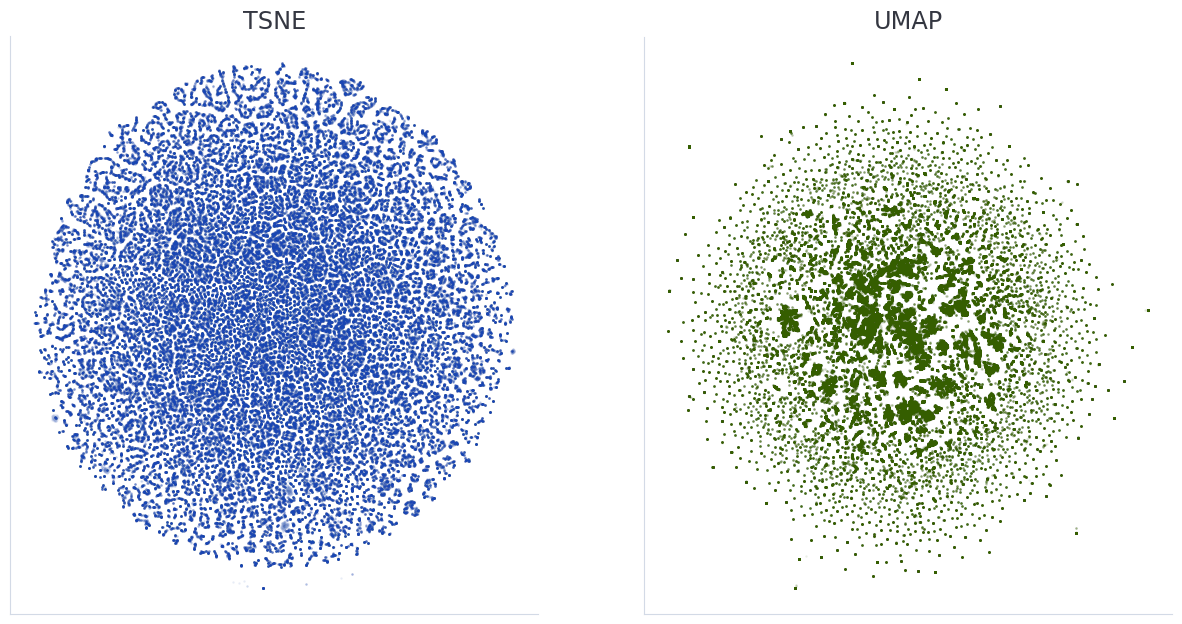

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5), sharex=False, sharey=False)

for name, ax, color in zip(('TSNE', 'UMAP'), axs, cs):
    sns.scatterplot(subset, x=f'{name}_x', y=f'{name}_y', ax=ax, color=color, ec=None,
                    alpha=0.1, s=2)
    ax.set_title(f'{name}')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [104]:
subset.sort_values('UMAP_y')

,index,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char,TSNE_x,TSNE_y,UMAP_x,UMAP_y
15187,33750,2,0.707107,0.629961,0.574349,0.552045,0.535887,12.0,69.0,57.0,...,0.0,0.0,6.5,False,0.000900,0.000225,17.202732,-103.405420,-10.589776,-25.574652
12646,25542,2,0.707107,0.629961,0.574349,0.552045,0.535887,12.0,69.0,57.0,...,0.0,0.0,6.5,False,0.000900,0.000225,17.202625,-103.407420,-10.589755,-25.574619
11771,22844,2,0.707107,0.629961,0.574349,0.552045,0.535887,12.0,69.0,57.0,...,0.0,0.0,6.5,False,0.000900,0.000225,17.202091,-103.405594,-10.589691,-25.574619
12949,26471,2,0.707107,0.629961,0.574349,0.552045,0.535887,12.0,68.0,56.0,...,0.0,0.0,6.0,False,0.001224,0.000306,18.612448,-106.349976,-10.589764,-25.574615
12231,24197,2,0.707107,0.629961,0.574349,0.552045,0.535887,12.0,68.0,56.0,...,0.0,0.0,6.0,False,0.001224,0.000306,18.611038,-106.347300,-10.589728,-25.574593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212348,343962,2,0.707107,0.629961,0.574349,0.552045,0.535887,30.0,40.0,10.0,...,0.0,6.0,0.0,False,0.025275,0.006319,-19.677694,-16.835075,-4.664091,26.518431
212013,343582,2,0.707107,0.629961,0.574349,0.552045,0.535887,22.0,30.0,8.0,...,0.0,6.0,0.0,False,0.003020,0.000755,-2.117830,-61.372566,-4.663944,26.518665
244010,377266,2,0.707107,0.629961,0.574349,0.552045,0.535887,30.0,40.0,10.0,...,0.0,6.0,0.0,False,0.025275,0.006319,-19.677694,-16.835075,-4.666991,26.521080
213487,345229,2,0.707107,0.629961,0.574349,0.552045,0.535887,22.0,30.0,8.0,...,0.0,6.0,0.0,False,0.003020,0.000755,-2.117830,-61.372566,-4.669941,26.525103


In [99]:
#X_tsne.to_csv("oqmd_tsne.csv")
subset.to_csv('X_tsne_umap.csv')
subset[['UMAP_x', 'UMAP_y']].to_csv('X_umap.csv')

In [78]:
subset_normed

array([[ 1.21135493,  0.52320089,  0.87331474, ...,  1.21275227,
        -2.21468186,  0.28877213],
       [-2.07632889,  1.66057695,  1.41146969, ...,  0.00542136,
        -0.31626186, -0.55059666],
       [-2.07632889,  1.66057695,  1.41146969, ..., -0.49742965,
        -0.31793769, -0.52181839],
       ...,
       [-0.43248698,  1.27150524,  1.35650071, ...,  3.39949112,
        -2.29199481,  0.44132527],
       [-0.43248698,  0.2173224 ,  0.15960835, ..., -0.78674996,
         0.3796047 ,  0.87686122],
       [ 1.21135493, -1.13016889, -1.11066613, ...,  2.36486239,
        -2.24994635,  1.64377992]])

In [94]:
df.shape

(41991, 135)

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# Generate some random data
# np.random.seed(42)
# x = np.random.normal(0, 1, 100)
# y = np.random.normal(0, 1, 100)

# Create DataFrame with the points
df = subset.iloc[:, 10:-10]

# Calculate the density using kernel density estimation
kde = kde.gaussian_kde(df.T)

# Define the grid for evaluation
x_grid, y_grid = np.mgrid[df['X'].min():df['X'].max():100j, df['Y'].min():df['Y'].max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the density on the grid
density = np.reshape(kde(positions).T, x_grid.shape)

# Plot the density heatmap
plt.imshow(density, origin='lower', aspect='auto', extent=[df['X'].min(), df['X'].max(), df['Y'].min(), df['Y'].max()])
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap')

# Show the plot
plt.show()

/tmp/ipykernel_2113/3341532239.py:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde(df.T)


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

In [75]:

# Evaluate the density at each sample position
densities = kde(X_tsne.T)

density_dict = {}

# Print the density values for each sample position
for i in range(len(X_tsne)):
    density = densities[i]
    #print(f"Density at sample position {i+1}: {density}")
    
    density_dict[i] = density

#print(density_dict)

sorted_density = sorted(density_dict.items(), key=lambda x: x[1])
#print(sorted_density)
top500 = [x[0] for x in sorted_density[:int(len(sorted_density)*.15)]]
X_sparse = X.iloc[top500]
print(X_sparse.shape)

NameError: name 'kde' is not defined

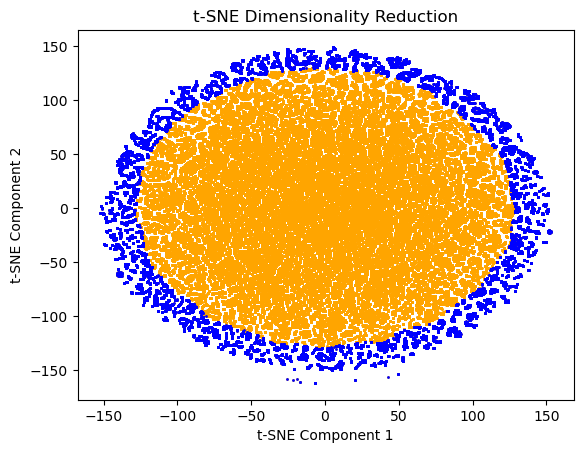

In [16]:
new = X_tsne_backup.iloc[top500]

plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], s=1, color="orange")
plt.scatter(X_tsne.iloc[top500, 0], X_tsne.iloc[top500, 1], s=1, color="blue")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Dimensionality Reduction')
plt.show()

In [74]:
Xshift = trainset.iloc[top500]
print(Xshift.shape)

NameError: name 'top500' is not defined

In [21]:
Xshift

,pretty_comp,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,avg f valence electrons,compound possible,max ionic char,avg ionic char,volume_pa,stability,delta_e,magmom_pa,bandgap,energy_pa
373161,GdMgZn,3,0.577350,0.480750,0.415244,0.389977,0.372041,12.0,64.0,52.0,...,2.333333,False,0.049365,0.008986,22.9118,45.356838,-0.170040,0.000357,0.0,-2.657911
373144,GdMgZn,3,0.577350,0.480750,0.415244,0.389977,0.372041,12.0,64.0,52.0,...,2.333333,False,0.049365,0.008986,24.9996,45.674601,0.147723,0.001658,0.0,-2.340148
373169,GdMgZn,3,0.577350,0.480750,0.415244,0.389977,0.372041,12.0,64.0,52.0,...,2.333333,False,0.049365,0.008986,23.1371,45.396226,-0.130651,0.000481,0.0,-2.618523
373174,GdMgZn,3,0.577350,0.480750,0.415244,0.389977,0.372041,12.0,64.0,52.0,...,2.333333,False,0.049365,0.008986,23.4122,45.441778,-0.085099,0.000845,0.0,-2.572971
353343,MgTi,2,0.707107,0.629961,0.574349,0.552045,0.535887,12.0,22.0,10.0,...,0.000000,False,0.013138,0.003284,19.6239,0.107328,0.105500,0.012822,0.0,-4.514787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254714,Ir2AuO4,3,0.654654,0.597048,0.575065,0.572069,0.571484,8.0,79.0,71.0,...,6.000000,False,0.319141,0.068232,12.8627,0.430505,-0.481771,0.143098,0.0,-6.063174
79948,PaOsO3,3,0.663325,0.614463,0.600984,0.600078,0.600002,8.0,91.0,83.0,...,3.200000,False,0.609724,0.116076,16.6020,1.273017,-0.934691,0.790227,0.0,-7.793019
91243,PaOsO3,3,0.663325,0.614463,0.600984,0.600078,0.600002,8.0,91.0,83.0,...,3.200000,False,0.609724,0.116076,12.5786,1.115972,-1.091736,0.290810,0.0,-7.950064
389016,Co2Rh3,2,0.721110,0.654213,0.615030,0.604895,0.601032,27.0,45.0,18.0,...,0.000000,False,0.039211,0.009411,14.3315,0.399264,0.399264,1.264157,0.0,-6.798205


In [20]:
#Xshift.to_csv('Xshft_testset.csv', index=False)

# y shift


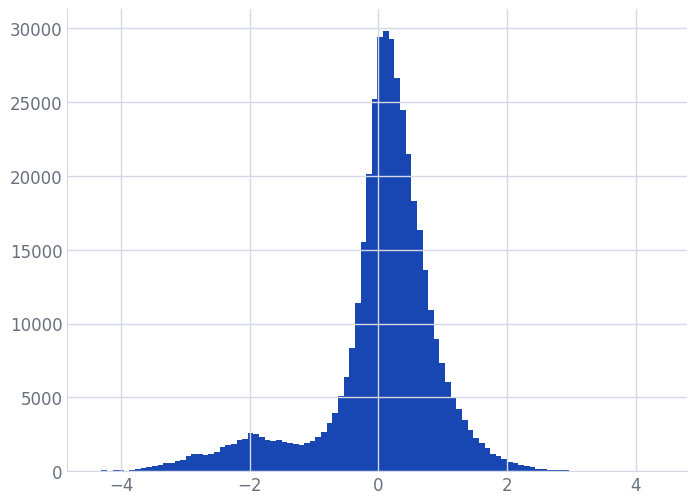

In [69]:
sorttrain = trainset.sort_values(by=['delta_e'])
hist = sorttrain.delta_e.hist(bins=100)

In [70]:
q1 = trainset['delta_e'].quantile(0.05)
q2 = trainset['delta_e'].quantile(0.95)
print(q1)
print(q2)
# Get the data within the quantile range
statY_testset = trainset[(trainset['delta_e'] > q2) | (trainset['delta_e'] < q1)]
statY_testset.shape

-2.0205888405879997
1.2363246468674993


(41992, 152)

In [71]:
infoY_testset = sorttrain.iloc[:int(len(sorttrain)*.1)]
infoY_testset.shape

(41990, 152)

In [72]:
statY_testset .to_csv('statY_testset.csv', index=False)
infoY_testset .to_csv('infoY_testset.csv', index=False)

# remove dup


In [73]:
print(Xshift.shape)
print(statY_testset.shape)
print(infoY_testset.shape)


NameError: name 'Xshift' is not defined

In [ ]:
Xshft_testset = Xshift

In [ ]:
Xshft_testset= Xshft_testset.drop_duplicates().dropna()
statY_testset= statY_testset.drop_duplicates().dropna()
infoY_testset= infoY_testset.drop_duplicates().dropna()

In [ ]:
print(final_train     .shape)
print(Xshft_testset.shape)
print(pizeo_testset.shape)
print(statY_testset.shape)
print(infoY_testset.shape)

(355030, 152)
(62985, 152)
(382, 152)
(41992, 152)
(41990, 152)


In [ ]:
Xshft_formula =[i[0] for i in Xshft_testset[['pretty_comp']].values.tolist()]
statY_formula =[i[0] for i in statY_testset[['pretty_comp']].values.tolist()]
infoY_formula =[i[0] for i in infoY_testset[['pretty_comp']].values.tolist()]


In [ ]:

print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(Xshft_formula)]
print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(statY_formula)]
print(final_train     .shape)
final_train=final_train[~final_train['pretty_comp'].isin(infoY_formula)]
print(final_train     .shape)

(355030, 152)
(304657, 152)
(269064, 152)
(260325, 152)


In [ ]:
final_train   .to_csv('final_trainset.csv', index=False)  


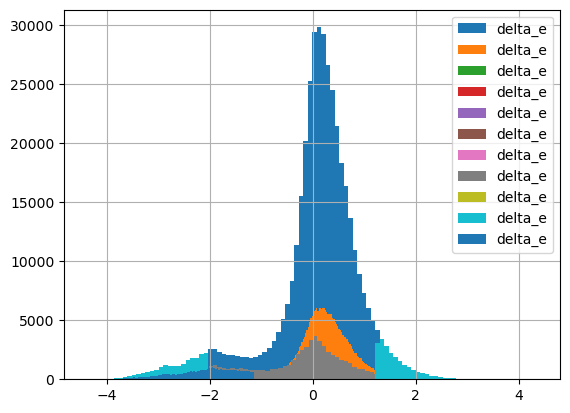

In [ ]:
hist = trainset.delta_e.hist(bins=100,legend=True)
hist = final_train.delta_e.hist(bins=100,legend=True)

hist = test_data1.delta_e.hist(bins=100,legend=True)
hist = test_data2.delta_e.hist(bins=100,legend=True)
hist = test_data3.delta_e.hist(bins=100,legend=True)
hist = test_data4.delta_e.hist(bins=100,legend=True)
hist = test_data5.delta_e.hist(bins=100,legend=True)

hist = Xshft_testset.delta_e.hist(bins=100,legend=True)
hist = pizeo_testset.delta_e.hist(bins=100,legend=True)
hist = statY_testset.delta_e.hist(bins=100,legend=True)
hist = infoY_testset.delta_e.hist(bins=100,legend=True)

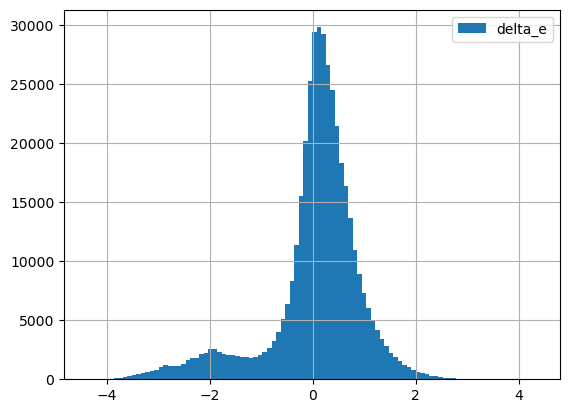

In [56]:
hist = trainset.delta_e.hist(bins=100,legend=True)


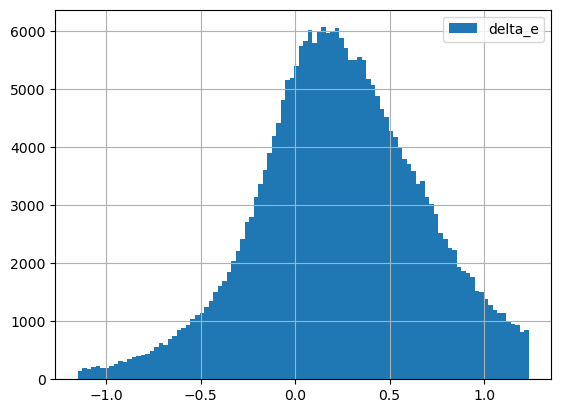

In [55]:
hist = final_train.delta_e.hist(bins=100,legend=True)

In [57]:
w = (max(trainset     .delta_e)-min(trainset     .delta_e) )/100

/tmp/ipykernel_3679605/4083676789.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


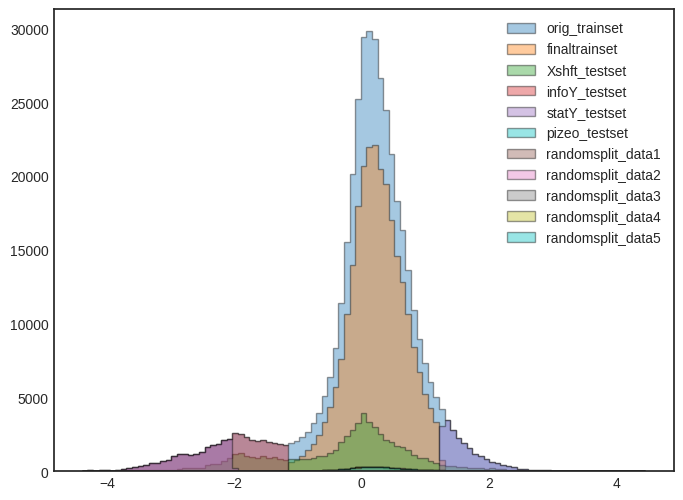

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('seaborn-white')
plt.figure(figsize=(8,6))
kwargs = dict(histtype='stepfilled', alpha=0.4,ec='k')

plt.hist(trainset     .delta_e,label="orig_trainset",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(final_train  .delta_e,label="finaltrainset",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(Xshft_testset.delta_e,label="Xshft_testset",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(infoY_testset.delta_e,label="infoY_testset",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(statY_testset.delta_e,label="statY_testset",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(pizeo_testset.delta_e,label="pizeo_testset",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs,color="c" )

plt.hist(test_data1.delta_e,label="randomsplit_data1",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(test_data2.delta_e,label="randomsplit_data2",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(test_data3.delta_e,label="randomsplit_data3",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(test_data4.delta_e,label="randomsplit_data4",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs)
plt.hist(test_data5.delta_e,label="randomsplit_data5",bins=np.arange(min(trainset.delta_e), max(trainset.delta_e) + w, w)   , **kwargs,color="c" )




plt.legend(loc='upper right')


plt.show()

In [ ]:

print(trainset     .shape)
print(Rsplt_testset.shape)
print(Xshft_testset.shape)
print(pizeo_testset.shape)
print(statY_testset.shape)
print(infoY_testset.shape)
print(final_train  .shape)
3697/5699

In [ ]:
'''
Rsplt_testset .to_csv('Rsplt_testset.csv', index=False)
Xshft_testset .to_csv('Xshft_testset.csv', index=False)
pizeo_testset .to_csv('pizeo_testset.csv', index=False)
statY_testset .to_csv('statY_testset.csv', index=False)
infoY_testset .to_csv('infoY_testset.csv', index=False)
final_train   .to_csv('final_trainset.csv', index=False)  
'''